# Analisando as notas em geral

In [4]:
import pandas as pd

# Carregando os dados dos arquivos importados no colab.
notas = pd.read_csv("ratings.csv")

In [5]:
#Preview das 5 primeiras informações
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
#Quantidade de dados
notas.shape

(100836, 4)

In [7]:
# Mostra o nome das colunas existentes
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [8]:
# Vamos renomear para facilitar a manipulação
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [9]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
# Mostra os valores únicos na series
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [11]:
# Quantidade de vezes que os valores se repetem, ordenado pela maior quantidade.
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [12]:
# Média e mediana das notas
print('Média', notas['nota'].mean())
print('Mediana', notas['nota'].median())


Média 3.501556983616962
Mediana 3.5


In [13]:
# Podemos acessar os atributos pelo nome.
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

Podemos plotar um gráfico de forma fácil usando a função **.plot()**

Ao passar o parâmetro **Kind** é possível alterar o tipo do gráfico.

Como queremos ver de forma visual como está distribuido as notas, escolhemos um gráfico do tipo Histograma.

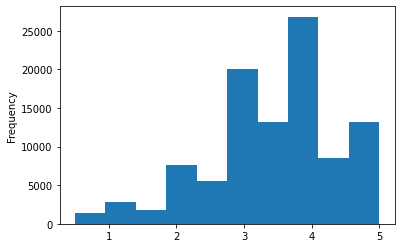

In [14]:
notas.nota.plot(kind='hist')

A função **.describe()** é uma função muito importante para entender alguns dados estatísticos de forma resumida.

In [15]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Para entender melhor os quartis mostrados pelo describe() e a distribuição do histograma vamos gerar um gráfico do tipo **bloxplot**.

Para isso vai ser necessário importar a biblioteca seaborn.

In [16]:
#!pip install seaborn=0.9.0
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


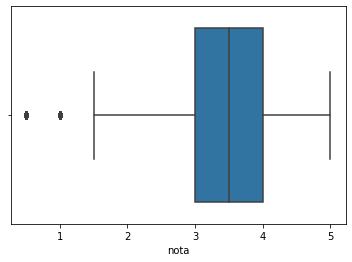

In [17]:
sns.boxplot(notas.nota)

Com esse gráfico fica evidente que a maior concentração das notas está entre a nota 3 e 4. E como visto anteriormente a mediana em 3.5

# Filmes

Agora vamos fazer análise exploratória dos filmes

In [18]:
# Importando o dataset dos filmes
filmes = pd.read_csv("movies.csv")

In [19]:
# Primeiros 5
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
# Renomear as colunas dos atributos
filmes.columns = ["filmeId", "titulo", "generos"]

filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filme

Para fazer uma interação melhor com os dados no nosso dataframe, podemos usar a função **.query()** Esta função filtra as informações conforme o que for passado por parâmetro.

No próximo comando vamos filtrar as notas que pertencem ao filme com o ID igual a 1

In [21]:
notas.query('filmeId==1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


Depois de filtrado podemos acessar os atributos diretamente pelo nome e fazer operações iguais as feitas anteriormente. **Ex: mean(), count()**

In [22]:
# Apenas as notas do filme 1 Toy Story (1995)
notas.query('filmeId==1').nota.mean()

3.9209302325581397

Para que não seja necessário filtrar cada filme temos a função **.groupby()**, que permite definir uma ou mais colunas para agrupar. 

Posteriormente podemnos usar as funções básicas como **.mean()** no DataFrame resultante.

In [35]:
# Outras possibilidades de interação
#notas.groupby('filmeId').nota.mean()
#notas.groupby("filmeId").mean()["nota"]

medias_por_filme = notas.groupby('filmeId').mean().nota

medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Agora vamos ver se a distribuição a média por filme mantém o mesmo comportamento que identificamos anteriormente, vamos fazer por meio de um histograma e bloxpot.

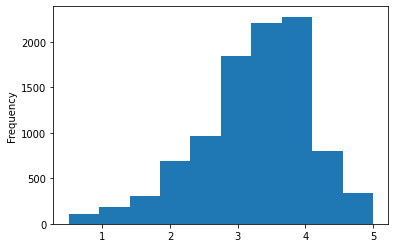

In [37]:
medias_por_filme.plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


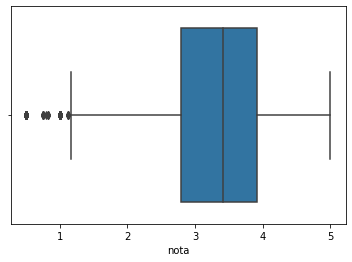

In [38]:
sns.boxplot(medias_por_filme)

In [39]:
medias_por_filme.describe( )

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Podemos também plotar gráficos de histograma pelo seaborn, por padrão ele calcula a quantidade de colunas que mostre a informação de uma forma otimizada, mas podemos alterar passando o **parâmetro bins=10**, por exemplo para gerar semelhante ao matplotlib.

Outra característica muito interessante é que ele gera uma curva para demonstrar a distribuição dos dados removendo os outlayers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


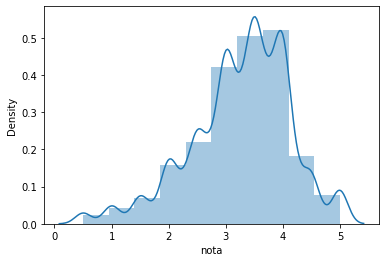

In [44]:
# Definindo bins
sns.distplot(medias_por_filme, bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


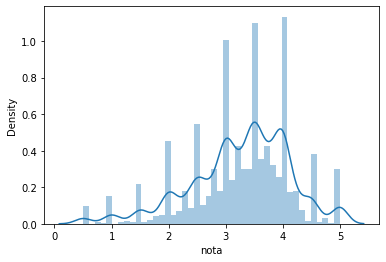

In [45]:
# Sem definir bins
sns.distplot(medias_por_filme)

### Gráficos

Por padrão o pandas e seaborn utilizam o matplotlib.pyplot como biblioteca mais baixo nível, e se for necessário também podemos utilizar diretamente.

In [46]:
import matplotlib.pyplot as plt

Depois de importado vamos simular a geração do histograma igual do pandas. A diferença que podemos alterar algumas propriedades.

Text(0.5, 1.0, 'Histograma das médias dos filmes')

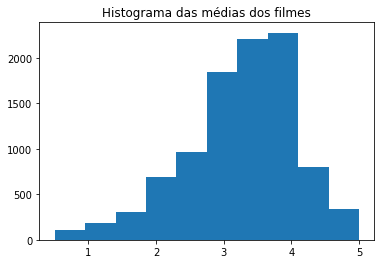

In [48]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

Como o seaborn utiliza o pyplot, podemos alterar as propriedades usando os mesmos comandos, como no exemplo abaixo:

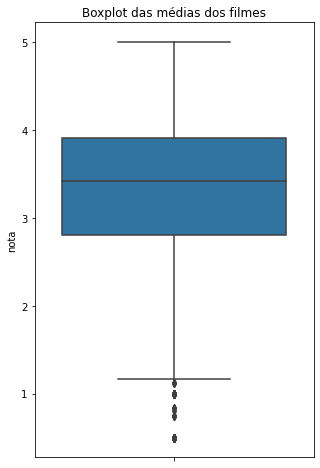

In [55]:
# Define o tamanho do gráfico e o título pelo pyplot
plt.figure(figsize=(5,8))
plt.title("Boxplot das médias dos filmes")

# Ao atribuir a serie para o parâmetro y, invertemos a visualização por padrão gerada no eixo X.
sns.boxplot(y=medias_por_filme)


# TMDB

Vamos explorar os tipos de variáveis.

Dataset completo pode ser baixado diretamente no kaggle pelo link:
https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [57]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [66]:
# Mostrando os valores únicos
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

É possível identificar que esse atributo é do tipo **categórico nominal.**

Também temos outros tipos neste dataset, como veremos a seguir.

###**Categórica ordinal**

In [70]:
tmdb.status.unique()


array(['Released', 'Post Production', 'Rumored'], dtype=object)

Para este caso a ordem é importante, e fica disposto desta maneira:

Rumored < Released < Post Production

### **Quantitativa contínuo**

In [74]:
tmdb.budget.head()

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

O budget é uma variavel quantitativa com valores contínuos.

In [75]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

A média de voto é quantitativo contínuo, mas pelo que da para perceber sem intervalor definido.

Já por exemplo as notas do movielens são sequenciais mas não contínuas pois tem um intevalo determinado de valores: 0.5, 1, 1.5 ... não tem 2.7

### Com a leitura do arquivo feita, como nós podemos fazer para visualizar cada nota única?

In [76]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

### Data visualization

Para acessar os valores como pode ser pela coluna e dentro das chaves, seguirei pelas chaves para identificar melhor que estou acessando o valor do atributo.

In [82]:
# Cria nova tabela com a lingua e a quantidade
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]

contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


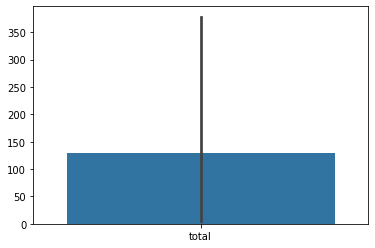

In [84]:
sns.barplot(data=contagem_de_lingua)

Por padrão gera um gráfico de forma estranha, vamos definir em qual eixo vai cada informação. 

Esse processo é facilitado pois estamos trabalhando com um dataframe.

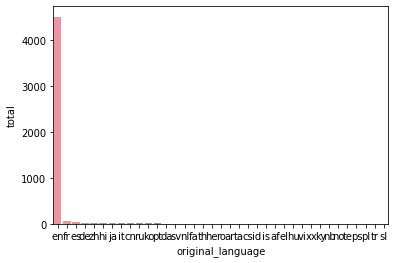

In [85]:
sns.barplot(x="original_language", y="total",data=contagem_de_lingua)

Esse processo é meio trabalhoso para fazer na mão, então vamos usar outra função para gerar o gráfico, a **.catplot()**, passando por parâmetro as informações para gerar o gráfico. Neste caso para contar a quantidade usamos o parâmetro **kind="count"**

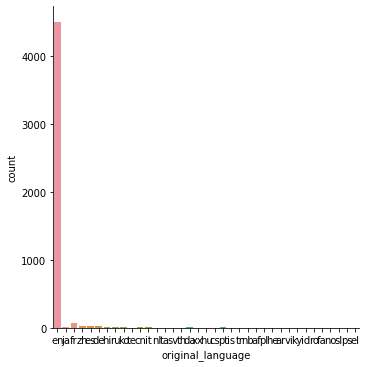

In [89]:
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x7fc14075aed0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

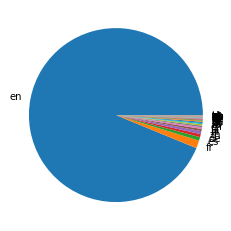

In [92]:
plt.pie(contagem_de_lingua["total"], labels=contagem_de_lingua["original_language"])

O gráfico de pizza dificilmente é usado pois fica difícil de perceber a proporção, principalmente com muitas categorias.

Devemos sempre pensar em como o usuário muitas vezes com pouca informação do contexto vai visualizar e entender a informação, para isso vamos gerar uma nova visualização, para isso vai ser necessário algumas manipulações.

In [101]:
contagem_por_lingua = tmdb["original_language"].value_counts()
total_geral = contagem_por_lingua.sum()
total_ingles = contagem_por_lingua.loc["en"]
total_restante = total_geral - total_ingles

In [107]:
# Cria novo DataFrame com os dados no formato que vamos precisar.
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_ingles, total_restante]
}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


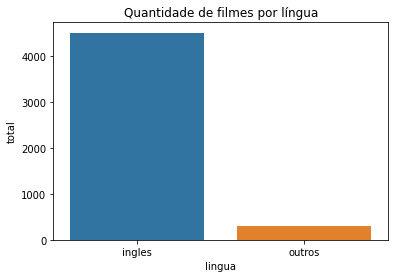

In [111]:
plt.title("Quantidade de filmes por língua")
sns.barplot(x="lingua", y="total", data=dados)

Depois de ver as tentativas anteriores de mostrar informação, esta foi de longe a melhor visualização, pois demonstrou para nosso usuário a diferença da quantidade de filmes em inglês para as outras.

Mas e estes filmes de outras linguas, quais são?

Vamos montar outra visualização para deixar claro essa informação.

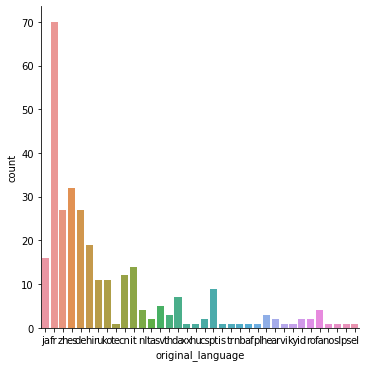

In [122]:
# tmdb.query("original_language != 'en' ").original_language.value_counts() # Quantidade por língua sem 'en'

filmes_sem_lingua_original_en = tmdb.query("original_language != 'en' ")
sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_en)
